In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
import pysal
import shapely.geometry
from shapely.geometry import Point, Polygon

/Users/priskawa/.virtualenvs/dataviz/lib/python3.7/site-packages/pysal/__init__.py:65: VisibleDeprecationWarning: PySAL's API will be changed on 2018-12-31. The last release made with this API is version 1.14.4. A preview of the next API version is provided in the `pysal` 2.0 prelease candidate. The API changes and a guide on how to change imports is provided at https://pysal.org/about
  ), VisibleDeprecationWarning)


# Erster Import

In [2]:
#Importieren wir die vorgefertige Weltkarte
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

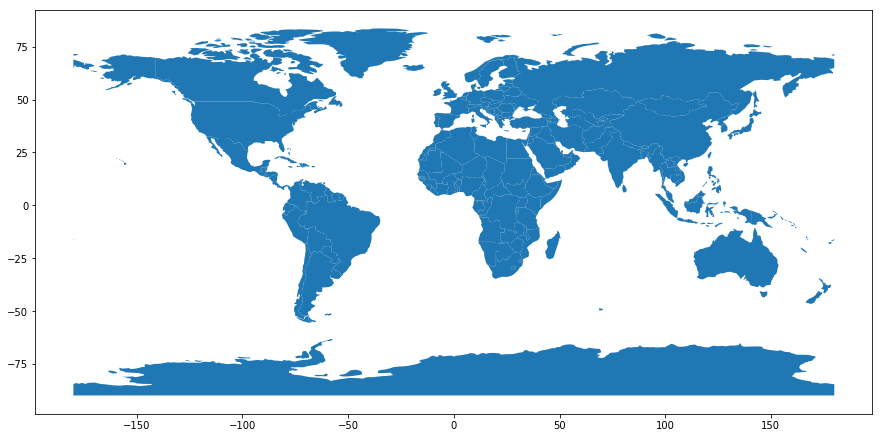

In [3]:
world.plot(figsize=(15,20))

In [4]:
pd.set_option('display.max_colwidth',-1)

In [5]:
pd.set_option('display.max_colwidth',50)

In [6]:
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,..."
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,..."
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...
5,2967004.0,Asia,Armenia,ARM,18770.0,"POLYGON ((43.58274580259273 41.09214325618257,..."
6,3802.0,Antarctica,Antarctica,ATA,760.4,(POLYGON ((-59.57209469261153 -80.040178725096...
7,140.0,Seven seas (open ocean),Fr. S. Antarctic Lands,ATF,16.0,"POLYGON ((68.935 -48.62500000000001, 69.58 -48..."
8,21262641.0,Oceania,Australia,AUS,800200.0,(POLYGON ((145.3979781434948 -40.7925485166058...
9,8210281.0,Europe,Austria,AUT,329500.0,"POLYGON ((16.97966678230404 48.12349701597631,..."


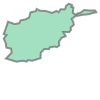

In [7]:
world["geometry"][0] #Das hier ist Afghanistan

/Users/priskawa/.virtualenvs/dataviz/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


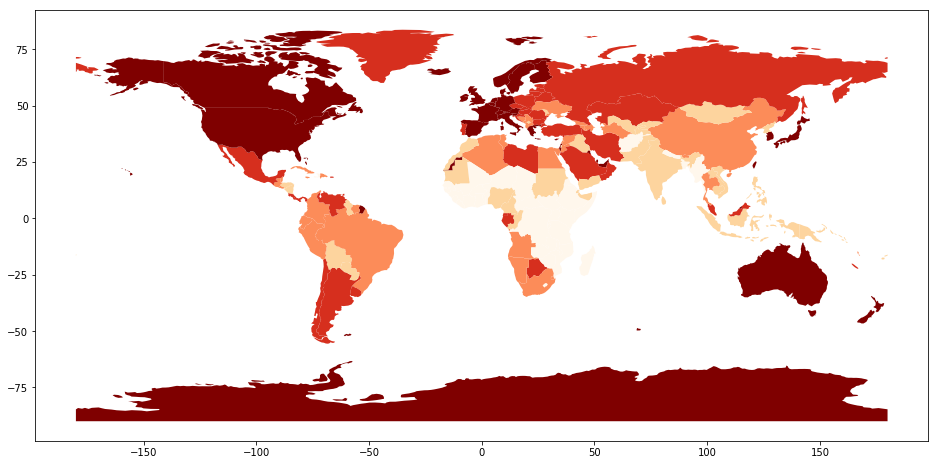

In [8]:
world['gdp_per_cap'] = world["gdp_md_est"] / world["pop_est"]
world.plot(column='gdp_per_cap', cmap='OrRd', scheme='quantiles', figsize=(16, 20));

#zum abspeichern der Karte:
plt.savefig("welt.pdf")

/Users/priskawa/.virtualenvs/dataviz/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


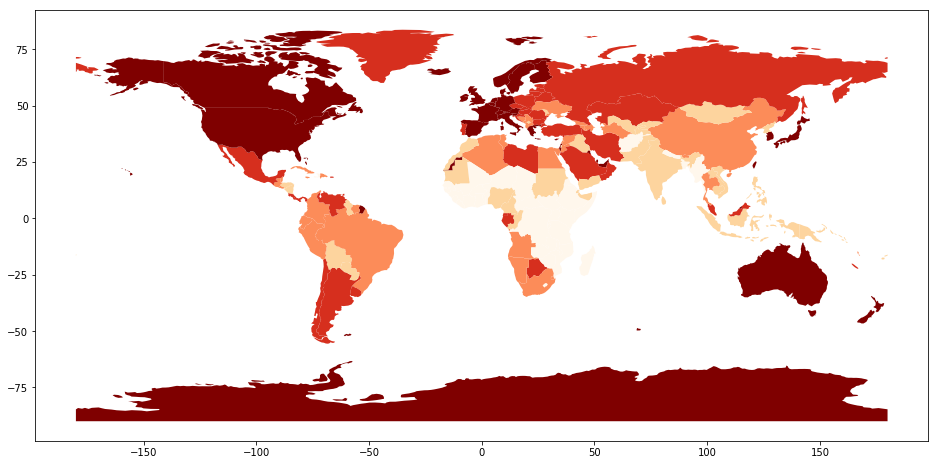

In [9]:
world['gdp_per_cap'] = world.gdp_md_est / world.pop_est
world.plot(column='gdp_per_cap', cmap='OrRd', scheme='quantiles', figsize=(16, 20));

In [10]:
! ls  #aus Jupyter Notebook auflisten, was sich im Ordner befindet, wo ich gerade arbeite...

01 APIs Google Indisch.ipynb
01 APIs Google Vietnamesisch.ipynb
01 APIs und Authentifikation (Google API).ipynb
02 Aufgaben Tag 16.ipynb
02 Geopandas.ipynb
03 Geopandas.ipynb
GEN_A4_GEMEINDEN_SEEN_2018_F_WGS84_.geojson
SHAPEFILE_LV03_LN02
franzrest_allcities.csv
indischrest_allcities.csv
indischrest_top20cities.csv
italrest_allcities.csv
italrest_top10cities.csv
italrests.csv
shapePLZ
switzerland.pdf
vietnamrest_allcities.csv
welt.pdf


In [11]:
world.crs

{'init': 'epsg:4326'}

# Arbeiten wir mit der Schweiz

In [12]:
ch = gpd.read_file("shapePLZ/plz_verzeichnis_v2.shp")
#https://map.geo.admin.ch/?lang=en&topic=ech&bgLayer=ch.swisstopo.pixelkarte-farbe&layers=ch.swisstopo.zeitreihen,ch.bfs.gebaeude_wohnungs_register,ch.bav.haltestellen-oev,ch.swisstopo.swisstlm3d-wanderwege,ch.swisstopo.swissboundaries3d-gemeinde-flaeche.fill&layers_visibility=false,false,false,false,true&layers_timestamp=18641231,,,,&catalogNodes=457,510

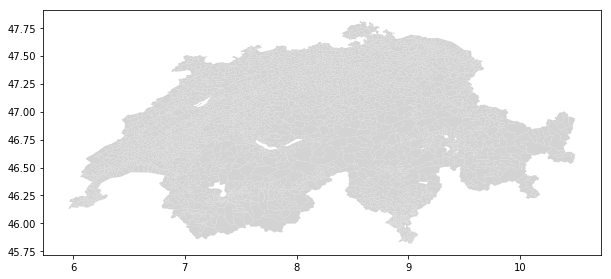

In [13]:
ch.plot(figsize=(10,10), color='lightgrey')
plt.savefig('switzerland.pdf')

In [14]:
df.head()

NameError: name 'df' is not defined

In [15]:
df.info()

NameError: name 'df' is not defined

In [16]:
# Step 1: Funktion, um einen Punkt zu machen
def make_point(row):
    return Point(row.Lng, row.Lat)
df = pd.read_csv('italrest_top10cities.csv')
# Step 2: Den Punkt machen
df['Points'] = df.apply(make_point, axis=1)

In [ ]:
# Step 1: Funktion, um einen Punkt zu machen
def make_point(row):
    return Point(row["Lng"], row["Lat"])  #übliche Art, wie wir besher Code geschrieben haben
df = pd.read_csv('italrest_top10cities.csv')
# Step 2: Den Punkt machen
df['Points'] = df.apply(make_point, axis=1)

In [17]:
df.head()

,Unnamed: 0,Addresse,Lat,Lng,Name,Rating,Points
0,0,"Am Münsterhof, Waaggasse 7, 8001 Zürich, Switz...",47.370115,8.540238,Orsini,4.6,POINT (8.540237599999999 47.3701154)
1,1,"Niederdorfstrasse 80, 8001 Zürich, Switzerland",47.376028,8.544154,La Pasta,4.4,POINT (8.544154199999999 47.3760283)
2,2,"Badenerstrasse 275, 8003 Zürich, Switzerland",47.376137,8.514691,Taverne da Angelo,4.4,POINT (8.5146914 47.3761366)
3,3,"Gertrudstrasse 37, 8003 Zürich, Switzerland",47.373396,8.515301,Da Michelangelo,4.5,POINT (8.515301199999998 47.37339559999999)
4,4,"Forchstrasse 168, 8032 Zürich, Switzerland",47.360204,8.565730,Marcellino,4.8,POINT (8.56573 47.36020389999999)


In [18]:
italrests = gpd.GeoDataFrame(df, geometry=list(df['Points']))
italrests.to_csv('italrests.csv', index=False)

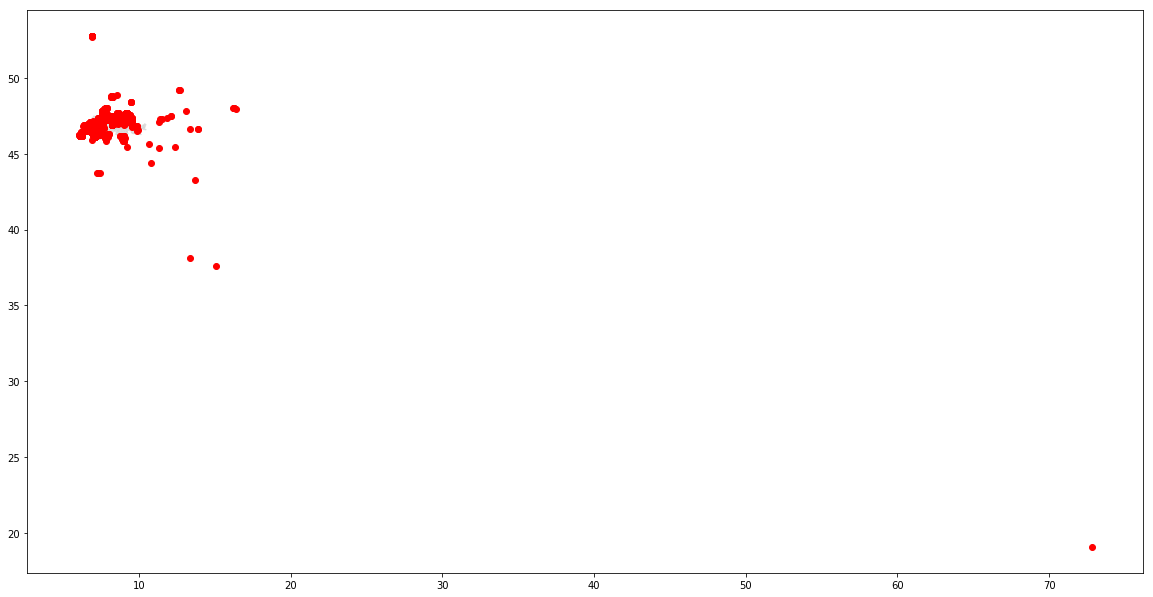

In [19]:
ax = ch.plot(figsize=(20,20), color='lightgrey')
italrests.plot(ax=ax, color='red')

In [20]:
italrests = italrests[italrests['Lat'] < 48]
italrests = italrests[italrests['Lat'] > 45]
italrests = italrests[italrests['Lng']>6]
italrests = italrests[italrests['Lng']<11]

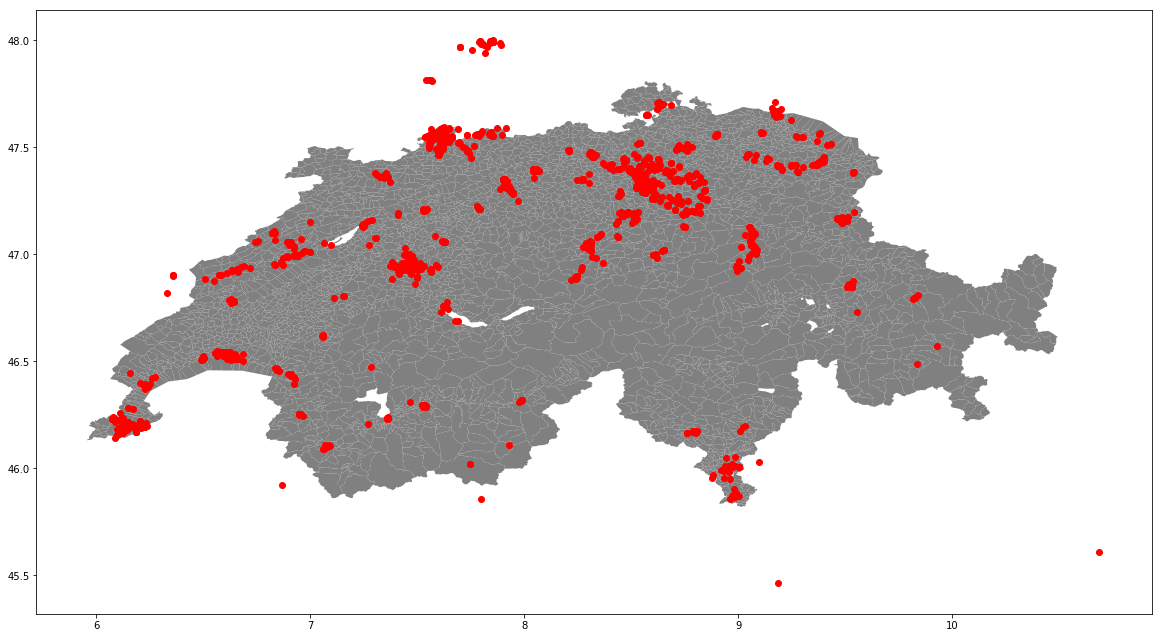

In [21]:
ax = ch.plot(figsize=(20,20), color='grey')
italrests.plot(ax=ax, color='red')

# SpatialJoin

In [22]:
ch.crs = {'init' :'epsg:4326'}
italrests.crs = {'init' :'epsg:4326'}

In [23]:
ch = ch.dropna()

In [24]:
ch_with_italrests = gpd.sjoin(italrests, ch, how="inner", op='intersects')

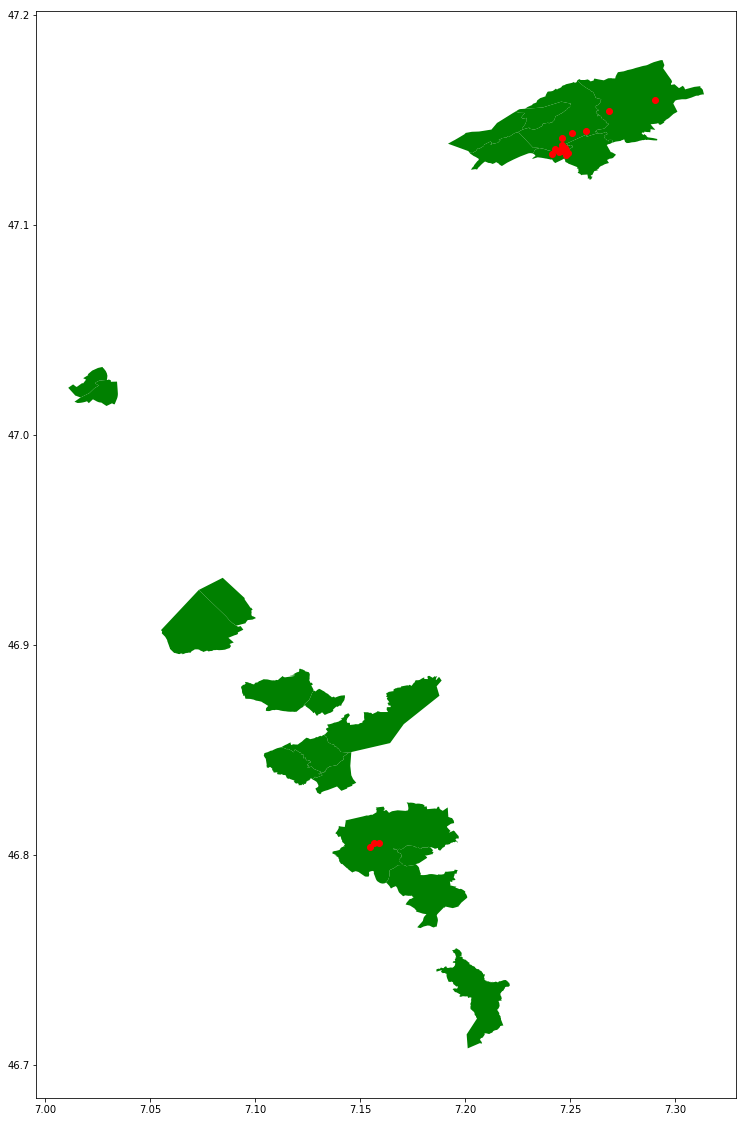

In [25]:
ax = ch.plot(figsize=(20,20), color='green')
ch_with_italrests.plot(ax=ax, color='red')

In [ ]:
ax = ch.plot(figsize=(20,20), color='green')
ch_with_italrests.plot(ax=ax, color='red', marker='.')

# Schauen wir uns Zürich an

In [ ]:
#https://statistik.zh.ch/internet/justiz_inneres/statistik/de/daten/Raeumliche_Daten/Basiskarten.html
zh = gpd.read_file("GEN_A4_GEMEINDEN_SEEN_2018_F/GEN_A4_GEMEINDEN_2018_F.shp")

In [ ]:
zh.crs = {'init' :'epsg:3857'}
italrests.crs = {'init' :'epsg:3857'}

In [ ]:
zh_with_italrests = gpd.sjoin(italrests, zh, how="inner", op='intersects')

In [ ]:
zh.plot(figsize=(10,10), color='green')


In [ ]:
zh.crs = {'init' :'epsg:4326'}

In [ ]:
zh.crs

In [ ]:
from shapely.geometry import Point, Polygon

In [ ]:
zh = gpd.read_file("GEN_A4_GEMEINDEN_SEEN_2018_F_WGS84_.geojson")

In [ ]:
zh_with_italrests = gpd.sjoin(italrests, zh, how="inner", op='intersects')
zh.crs = {'init' :'epsg:4326'}
italrests.crs = {'init' :'epsg:4326'}

In [ ]:
ax = zh.plot(figsize=(10,10), color='grey')
zh_with_italrests.plot(ax=ax, color='red', marker=".")